# Test Robin

In [17]:
import pandas as pd
import os
import gzip
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests
import datetime
from scipy import stats
from load_helper_CoronaWiki import *

In [18]:
data_path = "data/"

In [19]:
df_topics = pd.read_csv(data_path + "topics_linked.csv")

In [20]:
df_topics.head()

,index,Geography.Regions.Asia.Central Asia,Geography.Regions.Europe.Eastern Europe,History and Society.Military and warfare,Culture.Media.Television,History and Society.Education,Culture.Media.Books,Geography.Regions.Africa.Africa*,Culture.Visual arts.Architecture,Culture.Biography.Women,...,Geography.Regions.Asia.West Asia,STEM.Chemistry,Geography.Regions.Europe.Northern Europe,Culture.Media.Video games,Geography.Regions.Asia.Southeast Asia,Culture.Media.Entertainment,Culture.Media.Music,Geography.Regions.Asia.Asia*,Geography.Regions.Asia.North Asia,qid
0,Rosmalen,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2001490
1,Commelinales,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q290349
2,Transport_in_Honduras,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q1130638
3,QuakeC,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q2122062
4,Food_writing,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Q5465542


In [9]:
agg = load_aggregated("data/aggregated_timeseries.json.gz")

In [21]:
interventions = load_interventions("data/interventions.csv")
topics_df, topics = load_topics('data/topics_linked.csv.xz')
agg = load_aggregated("data/aggregated_timeseries.json.gz")
codes_order = ["sr", "it", "fr", "en", "nl", "ko", "de", "fi", "ja", "no", "sv", "da"]
dfs_pca_shift = load_pca(codes_order, pca_folder="data/pca/")

In [64]:
df_agg = pd.DataFrame.from_dict(agg)
fr_covid = pd.DataFrame.from_dict(df_agg['fr']['covid'])
print(fr_covid.drop(fr_covid.loc[fr_covid.index < '2020-01-01'].index, axis = 0).drop('len', axis= 1).head(300))

             sum   percent
2020-01-01    45  0.000008
2020-01-02    74  0.000009
2020-01-03    94  0.000011
2020-01-04    89  0.000012
2020-01-05   133  0.000016
...          ...       ...
2020-07-27  1100  0.000161
2020-07-28  1094  0.000168
2020-07-29   923  0.000149
2020-07-30   950  0.000158
2020-07-31   813  0.000148

[213 rows x 2 columns]


Let`s plot the number of covid related searches in france from 2020-01-01 to 2020-07-31 

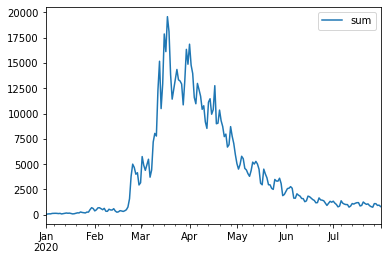

In [68]:
fr_covid_period = fr_covid.drop(fr_covid.loc[fr_covid.index < '2020-01-01'].index, axis = 0).drop(['percent', 'len'], axis= 1)
fr_covid_period.plot();

Let`s plot the number of covid related searches in france from 2020-07-01 to 2020-08-01 

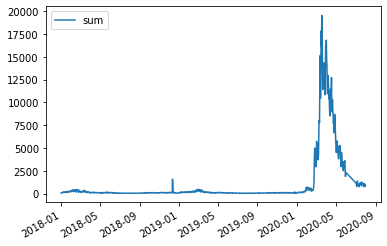

In [77]:
fr_covid_june = fr_covid.drop(fr_covid.loc[(fr_covid.index <= '2020-07-01') & (fr_covid.index > '2020-06-01') ].index, axis = 0).drop(['percent', 'len'], axis= 1)
fr_covid_june.plot();

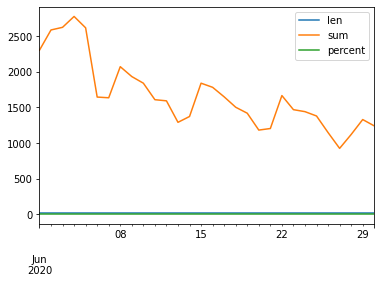

In [83]:
#fr_covid[fr_covid.index.between( '2020-06-01', '2020-07-01')]
#fr_covid_june= fr_covid.query(fr_covid.index>= '2020-06-01' and fr_covid.index <=  '2020-07-01')
mask = (fr_covid.index>= '2020-06-01') & (fr_covid.index < '2020-07-01')
fr_covid_june= fr_covid.loc[mask]

fr_covid_june.plot();

from the plot we can see that there is a downward plot with a period of 7 days, where 7,15,22 are mondays

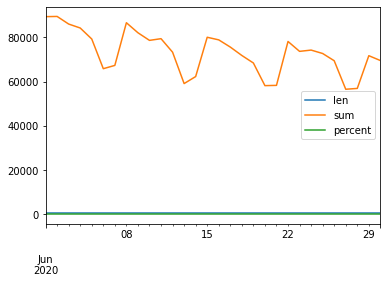

In [85]:
en_covid = pd.DataFrame.from_dict(df_agg['en']['covid'])
mask = (en_covid.index>= '2020-06-01') & (en_covid.index < '2020-07-01')
en_covid_june= en_covid.loc[mask]

en_covid_june.plot();